In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
#working directory
os.chdir("C:\\Users\\shive\\Desktop\\MS-BAIM\\Courses\\online courses\\A-Z Deep Learning\\Deep_Learning_A_Z\\Volume 1 - Supervised Deep Learning\\Part 3 - Recurrent Neural Networks (RNN)\\Section 12 - Building a RNN\\Recurrent_Neural_Networks")

# Data Import and Data Preprocessing

In [6]:
#importing the training set
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
#extraxting the Opening stock price in array format
training_set= dataset_train.iloc[:,1:2].values
training_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [11]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [14]:
#creating a data structure with 60 timestamp and 1 output
x_train= []
y_train=[]
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i])
x_train, y_train= np.array(x_train), np.array(y_train) 

In [21]:
x_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [22]:
#reshaping
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building the RNN

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [27]:
#initialising the RNN
regressor = Sequential()

In [29]:
#adding first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#adding second LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
#adding third LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
#adding fourth LSTM layer and some dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [30]:
#adding output layer
regressor.add(Dense(units = 1))

In [31]:
#compiling the RNN
regressor.compile(optimizer= "adam", loss= "mean_squared_error")

In [32]:
#Fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0418
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0080
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0058
Epoch 6/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [==============================] - 10s 8ms/step 

# Making the Prediction and Visualizing the result

In [33]:
#importing the real stock price of 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price= dataset_test.iloc[:, 1:2].values

In [37]:
#creating the predicted stock price of 2017
dataset_total= pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
input= dataset_total[len(dataset_total)-len(dataset_test)-60:].values
input= input.reshape(-1,1)
input= sc.transform(input)
x_test=[]
for i in range(60,len(input)):
    x_test.append(input[i-60:i, 0])
x_test= np.array(x_test)
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price= regressor.predict(x_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

In [38]:
predicted_stock_price[:5]

array([[791.6921 ],
       [789.02057],
       [788.6772 ],
       [789.42487],
       [791.8675 ]], dtype=float32)

In [40]:
import math
from sklearn.metrics import mean_squared_error
rmse= math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print("rmse value:", round(rmse,2))

rmse value: 11.88


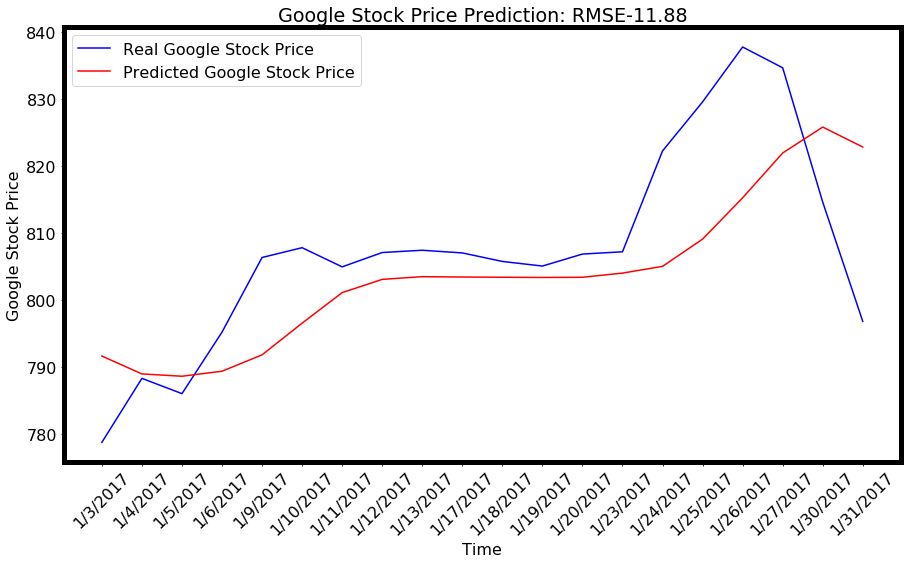

In [51]:
fig= plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(5)
plt.rcParams.update({'font.size': 16})
plt.plot(dataset_test["Date"], real_stock_price, color = "blue", label = "Real Google Stock Price")
plt.plot(dataset_test["Date"], predicted_stock_price, color = "red", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction: RMSE-11.88")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()
#plt.savefig('Google_Prediction.png')
#plt.close(fig)